In [1]:
using Pkg
Pkg.activate("D:\\Science\\Code\\Julia\\envr")

  Activating project at `D:\Science\Code\Julia\envr`


In [2]:
using DifferentialEquations, StaticArrays, DynamicalSystems, CairoMakie, JLD

In [3]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)

    return SVector(du1, du2, du3)
end

function output(idx, parameter, u0)
    println("index: $idx; I0: $parameter");flush(stdout)
    println("u0: $u0");flush(stdout)
end
function output(Λ, u0)
    println("Λ: $Λ");flush(stdout)
    println("last point: $u0");flush(stdout)
end
function separate()
    println("----------------");flush(stdout)
    println("  ");flush(stdout)
end

separate (generic function with 1 method)

In [4]:
time = 2500.0
transient_time = 500.0
tstep = 0.001
trange = range(0.0, time, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [5]:
const τ = 0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375
const xthr = 0.9; const ythr = 0.4
α = 0.0900; U0 = 0.40; ΔU0 = 0.330

0.33

In [6]:
u0 = SA[0.5016565343933567, 0.8843561571148351, 0.3465491964077342]

3-element SVector{3, Float64} with indices SOneTo(3):
 0.5016565343933567
 0.8843561571148351
 0.3465491964077342

In [7]:
I0range = range( -0.09639, -0.09655, step = -0.0000001 )

-0.09639:-1.0e-7:-0.09655

In [8]:
Λs =  zeros(length(I0range), 3)
u0s = zeros(length(I0range), 3);

In [9]:
for (idx, I0) in enumerate(I0range)

    if idx == 1
        global u0 = SA[0.5016565343933567, 0.8843561571148351, 0.3465491964077342]
    end

    output(idx, I0, u0)

    p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
    ds = ContinuousDynamicalSystem(TM,  u0, p)

    tr = trajectory(ds, 500.0, Δt = tstep; Ttr = transient_time, diffeq = integ_set)
    u0 = tr[end]; ds = ContinuousDynamicalSystem(TM,  u0, p)
    Λ = lyapunovspectrum(ds, time; diffeq = integ_set)
    Λs[idx, :] = Λ
    u0s[idx, :] = u0
    
    output(Λs[idx, :], u0s[idx, :])
    separate()
    
end

index: 1; I0: -0.09639
u0: [0.5016565343933567, 0.8843561571148351, 0.3465491964077342]
Λ: [0.003945156886052332, -0.012953819431001696, -5.275699247846947]
last point: [10.659486544367258, 0.4006502181055184, 0.39904285206335016]
----------------
  
index: 2; I0: -0.0963901
u0: [10.659486544367258, 0.4006502181055184, 0.39904285206335016]
Λ: [-7.032465461427025e-5, -0.010429436788425424, -5.273906077403706]
last point: [0.058652948323369127, 0.9834640402707143, 0.3882343574262269]
----------------
  
index: 3; I0: -0.0963902
u0: [0.058652948323369127, 0.9834640402707143, 0.3882343574262269]
Λ: [0.0006227234360875804, -0.010591483712351291, -5.27441594349159]
last point: [0.4180242313888715, 0.9099496158580311, 0.3476162034502924]
----------------
  
index: 4; I0: -0.0963903
u0: [0.4180242313888715, 0.9099496158580311, 0.3476162034502924]
Λ: [0.003591915807214216, -0.011080061849715083, -5.276050468899581]
last point: [4.011483644315975, 0.49796893115536733, 0.3889509865920172]
-------

u0: [0.0748589393666208, 0.9695047378180207, 0.37141284638400696]
Λ: [0.0027754424141467463, -0.00852243885022831, -5.272489381641995]
last point: [0.6750048973270375, 0.8297706653977716, 0.3508865036993187]
----------------
  
index: 34; I0: -0.0963933
u0: [0.6750048973270375, 0.8297706653977716, 0.3508865036993187]
Λ: [0.003474744881800734, -0.009524224004139319, -5.273822803303826]
last point: [21.29790241687354, 0.8008446685102958, 0.4187968031350148]
----------------
  
index: 35; I0: -0.0963934
u0: [21.29790241687354, 0.8008446685102958, 0.4187968031350148]
Λ: [0.000839962704784016, -0.008199547573346197, -5.271248826991944]
last point: [0.06156417452373368, 0.972439657450218, 0.3735976480921616]
----------------
  
index: 36; I0: -0.0963935
u0: [0.06156417452373368, 0.972439657450218, 0.3735976480921616]
Λ: [0.0021579848239812005, -0.011136816306843858, -5.270731301201399]
last point: [0.6120059498212207, 0.8488244318768107, 0.3487501987838993]
----------------
  
index: 37; I0:

last point: [3.4190667295675703, 0.5199013755208812, 0.38687353477858216]
----------------
  
index: 66; I0: -0.0963965
u0: [3.4190667295675703, 0.5199013755208812, 0.38687353477858216]
Λ: [0.004288061819608919, -0.03987326722399003, -5.254378831656708]
last point: [0.11907547448394395, 0.9890619211707503, 0.4082416868858105]
----------------
  
index: 67; I0: -0.0963966
u0: [0.11907547448394395, 0.9890619211707503, 0.4082416868858105]
Λ: [0.00024921753652357354, -0.039191872070636714, -5.254861011540219]
last point: [0.0840131095903862, 0.9685115178392847, 0.37086232233313254]
----------------
  
index: 68; I0: -0.0963967
u0: [0.0840131095903862, 0.9685115178392847, 0.37086232233313254]
Λ: [0.0017705471624944013, -0.03970970582508425, -5.253656637636724]
last point: [0.4709141094312205, 0.8947945299782742, 0.34663444672895455]
----------------
  
index: 69; I0: -0.0963968
u0: [0.4709141094312205, 0.8947945299782742, 0.34663444672895455]
Λ: [0.0025771085569707775, -0.04162142864954183,

  
index: 98; I0: -0.0963997
u0: [0.06007151034998115, 0.9768533363488902, 0.37922494627009873]
Λ: [0.0018275316339279, -0.07017125901516598, -5.237205907601877]
last point: [0.2581801959926774, 0.9465995828352478, 0.35720156904744527]
----------------
  
index: 99; I0: -0.0963998
u0: [0.2581801959926774, 0.9465995828352478, 0.35720156904744527]
Λ: [0.0008819425003171183, -0.07124469618316728, -5.235763951901228]
last point: [0.4995438900021346, 0.8858110209913976, 0.3465532785888345]
----------------
  
index: 100; I0: -0.0963999
u0: [0.4995438900021346, 0.8858110209913976, 0.3465532785888345]
Λ: [0.0018344620679880753, -0.07096432532499843, -5.235623282969908]
last point: [1.0198557875546324, 0.7415590812571123, 0.3627529200239963]
----------------
  
index: 101; I0: -0.0964
u0: [1.0198557875546324, 0.7415590812571123, 0.3627529200239963]
Λ: [0.0028273822849804267, -0.0721878920179335, -5.2363048339080605]
last point: [6.467829724761176, 0.4423242257371091, 0.3943211028746155]
------

Λ: [0.00204318986297107, -0.10245469796943352, -5.21858141451333]
last point: [30.181261677283157, 0.41322625910069843, 0.40871183831939]
----------------
  
index: 131; I0: -0.096403
u0: [30.181261677283157, 0.41322625910069843, 0.40871183831939]
Λ: [0.0017873812026785085, -0.10337177162276538, -5.217623233713109]
last point: [6.6529479690926765, 0.9355714866238798, 0.4198340995193258]
----------------
  
index: 132; I0: -0.0964031
u0: [6.6529479690926765, 0.9355714866238798, 0.4198340995193258]
Λ: [0.0019312000455836038, -0.10472367476890021, -5.2154471343382]
last point: [0.20067018915257645, 0.9885625846909694, 0.4118331399160212]
----------------
  
index: 133; I0: -0.0964032
u0: [0.20067018915257645, 0.9885625846909694, 0.4118331399160212]
Λ: [0.0017373173177558994, -0.10543015325415843, -5.214526224385468]
last point: [0.08481888586063424, 0.9883488796426346, 0.40299306767487814]
----------------
  
index: 134; I0: -0.0964033
u0: [0.08481888586063424, 0.9883488796426346, 0.40299

last point: [0.44346971067434626, 0.9038488546517082, 0.34709646575218794]
----------------
  
index: 163; I0: -0.0964062
u0: [0.44346971067434626, 0.9038488546517082, 0.34709646575218794]
Λ: [0.0010060104945161608, -0.1388859180849295, -5.194442665121456]
last point: [0.3998967730706731, 0.9167336263146214, 0.34852929208419803]
----------------
  
index: 164; I0: -0.0964063
u0: [0.3998967730706731, 0.9167336263146214, 0.34852929208419803]
Λ: [0.0011204165083128898, -0.14029459088696425, -5.193659929254756]
last point: [0.3542287943967464, 0.9286965010849981, 0.35093453229834987]
----------------
  
index: 165; I0: -0.0964064
u0: [0.3542287943967464, 0.9286965010849981, 0.35093453229834987]
Λ: [0.0009322503253790327, -0.14120487210175564, -5.193048137145734]
last point: [0.3036307814062929, 0.9396202058657602, 0.3543267613955948]
----------------
  
index: 166; I0: -0.0964065
u0: [0.3036307814062929, 0.9396202058657602, 0.3543267613955948]
Λ: [0.0005094052267831743, -0.1420845686730220

----------------
  
index: 195; I0: -0.0964094
u0: [0.06514471455061382, 0.9855233756373738, 0.39395388782239843]
Λ: [0.004218576458598517, -0.17798838797787211, -5.169747679692938]
last point: [0.2638150420469252, 0.9880220780699402, 0.41294570168568695]
----------------
  
index: 196; I0: -0.0964095
u0: [0.2638150420469252, 0.9880220780699402, 0.41294570168568695]
Λ: [0.0029832399986063464, -0.17790222392925503, -5.17184060520089]
last point: [24.487618576391142, 0.38847112734280487, 0.40643816271879835]
----------------
  
index: 197; I0: -0.0964096
u0: [24.487618576391142, 0.38847112734280487, 0.40643816271879835]
Λ: [0.0025592037986803336, -0.17958140298003974, -5.169331486850821]
last point: [1.8867743543743043, 0.6164858455611057, 0.37738208310143945]
----------------
  
index: 198; I0: -0.0964097
u0: [1.8867743543743043, 0.6164858455611057, 0.37738208310143945]
Λ: [0.0013319135634575392, -0.18028580392729818, -5.167410042531962]
last point: [0.7215668981057903, 0.81508990966336

u0: [1.1685005081426658, 0.7122310041354603, 0.36655806107055805]
Λ: [0.0005632068583205358, -0.21630999862528938, -5.143664697456747]
last point: [0.4183941260771336, 0.9116671010940679, 0.34784689671342944]
----------------
  
index: 228; I0: -0.0964127
u0: [0.4183941260771336, 0.9116671010940679, 0.34784689671342944]
Λ: [0.0033461671018368104, -0.21830645610732322, -5.143010863888526]
last point: [0.08066742618966695, 0.9710691183935592, 0.3736686685769328]
----------------
  
index: 229; I0: -0.0964128
u0: [0.08066742618966695, 0.9710691183935592, 0.3736686685769328]
Λ: [0.0023884894337042307, -0.2196779763917948, -5.141982024261956]
last point: [0.12670955361674271, 0.9888703065164187, 0.40877920167354465]
----------------
  
index: 230; I0: -0.0964129
u0: [0.12670955361674271, 0.9888703065164187, 0.40877920167354465]
Λ: [0.0018489585846067807, -0.22008679722149224, -5.142009058592069]
last point: [4.099537853442175, 0.49544034558917466, 0.38911839402311044]
----------------
  
in

Λ: [0.0012871888669182185, -0.2606662220741347, -5.114306313971416]
last point: [5.165395924699744, 0.46717006651446485, 0.39178405564585983]
----------------
  
index: 260; I0: -0.0964159
u0: [5.165395924699744, 0.46717006651446485, 0.39178405564585983]
Λ: [0.0021167962784578143, -0.2604974505803125, -5.114039028328823]
last point: [0.42214675226635257, 0.9052041492166331, 0.34712370111901086]
----------------
  
index: 261; I0: -0.096416
u0: [0.42214675226635257, 0.9052041492166331, 0.34712370111901086]
Λ: [0.001470052297289699, -0.26232513175434435, -5.112204447595546]
last point: [0.057749572853167924, 0.9842160100041003, 0.38820315392850185]
----------------
  
index: 262; I0: -0.0964161
u0: [0.057749572853167924, 0.9842160100041003, 0.38820315392850185]
Λ: [0.0022529284119531777, -0.2637206830312114, -5.112545187760117]
last point: [8.056511038133419, 0.42162787308467786, 0.3965194849064849]
----------------
  
index: 263; I0: -0.0964162
u0: [8.056511038133419, 0.4216278730846778

last point: [30.039869173563233, 0.6969468492754087, 0.4166064817590827]
----------------
  
index: 292; I0: -0.0964191
u0: [30.039869173563233, 0.6969468492754087, 0.4166064817590827]
Λ: [0.0004716570135983383, -0.3089624365739567, -5.079810937487509]
last point: [0.4290792509137255, 0.9029599077170772, 0.34695476403008674]
----------------
  
index: 293; I0: -0.0964192
u0: [0.4290792509137255, 0.9029599077170772, 0.34695476403008674]
Λ: [8.861631180399406e-5, -0.3085453579949919, -5.077551905495352]
last point: [0.08673695620029745, 0.9891808747196232, 0.4036919484883914]
----------------
  
index: 294; I0: -0.0964193
u0: [0.08673695620029745, 0.9891808747196232, 0.4036919484883914]
Λ: [0.003428801959838115, -0.31210442622253437, -5.07832270575758]
last point: [0.7911945754878826, 0.796877140833754, 0.3552298159906151]
----------------
  
index: 295; I0: -0.0964194
u0: [0.7911945754878826, 0.796877140833754, 0.3552298159906151]
Λ: [0.0008206411979140716, -0.31201158351637215, -5.0763

----------------
  
index: 324; I0: -0.0964223
u0: [1.2753911086818157, 0.6936972842820295, 0.36885195255787007]
Λ: [0.0003155113066093269, -0.36108872249900154, -5.04182007959668]
last point: [0.0605396812465767, 0.9807423525575156, 0.3852809620609583]
----------------
  
index: 325; I0: -0.0964224
u0: [0.0605396812465767, 0.9807423525575156, 0.3852809620609583]
Λ: [0.0013085807650355613, -0.36317313040629007, -5.040467941000307]
last point: [0.8522471746800536, 0.7795946427354564, 0.3574781373986773]
----------------
  
index: 326; I0: -0.0964225
u0: [0.8522471746800536, 0.7795946427354564, 0.3574781373986773]
Λ: [0.0022282974826475675, -0.3633081291617302, -5.039501535355211]
last point: [0.06823030664514187, 0.9876776997926457, 0.3968423585724649]
----------------
  
index: 327; I0: -0.0964226
u0: [0.06823030664514187, 0.9876776997926457, 0.3968423585724649]
Λ: [0.0015831379651516646, -0.36459400934843755, -5.038468321649311]
last point: [0.5883537808624726, 0.8574269152551586, 0.3

u0: [0.07424004030601844, 0.9871333218541947, 0.3991516012473026]
Λ: [0.0001965418205329879, -0.41815340132880785, -4.999128786967563]
last point: [0.35034101052947214, 0.9213169287951655, 0.3491695333995639]
----------------
  
index: 357; I0: -0.0964256
u0: [0.35034101052947214, 0.9213169287951655, 0.3491695333995639]
Λ: [0.0025918332275489354, -0.4193699364584093, -4.998415308839335]
last point: [4.778544059385593, 0.47565393598958733, 0.3911089137757438]
----------------
  
index: 358; I0: -0.0964257
u0: [4.778544059385593, 0.47565393598958733, 0.3911089137757438]
Λ: [0.002237983714278259, -0.42235640114720535, -4.996327788810829]
last point: [0.06096968240057308, 0.981863271816599, 0.38717777367608663]
----------------
  
index: 359; I0: -0.0964258
u0: [0.06096968240057308, 0.981863271816599, 0.38717777367608663]
Λ: [-0.0010072822245835093, -0.423396394664151, -4.993610063649355]
last point: [0.47441502809830643, 0.8893182446171557, 0.3464708772286381]
----------------
  
index: 3

Λ: [0.0008864875745890171, -0.48101878722417757, -4.94900164872075]
last point: [0.052661840567214874, 0.9792066764614235, 0.37963880618859214]
----------------
  
index: 389; I0: -0.0964288
u0: [0.052661840567214874, 0.9792066764614235, 0.37963880618859214]
Λ: [0.002941567796210477, -0.4860388187164039, -4.9473558477856665]
last point: [0.40245464607181636, 0.9167996112977131, 0.3485595745545932]
----------------
  
index: 390; I0: -0.0964289
u0: [0.40245464607181636, 0.9167996112977131, 0.3485595745545932]
Λ: [0.0011794979135102506, -0.4881284987731443, -4.944886131071809]
last point: [1.3257926211038416, 0.6853182236838344, 0.3696897611045965]
----------------
  
index: 391; I0: -0.096429
u0: [1.3257926211038416, 0.6853182236838344, 0.3696897611045965]
Λ: [0.0017419256955887327, -0.48863412176867166, -4.945155417299084]
last point: [7.457693512485307, 0.9291986559452962, 0.42007626715427854]
----------------
  
index: 392; I0: -0.0964291
u0: [7.457693512485307, 0.9291986559452962, 0

last point: [0.16914433838111556, 0.947647363763192, 0.3569029502912051]
----------------
  
index: 421; I0: -0.096432
u0: [0.16914433838111556, 0.947647363763192, 0.3569029502912051]
Λ: [0.0014437916767590315, -0.5602649010062578, -4.886524153407414]
last point: [0.4674414842095119, 0.8969428559199489, 0.3467358290629035]
----------------
  
index: 422; I0: -0.0964321
u0: [0.4674414842095119, 0.8969428559199489, 0.3467358290629035]
Λ: [0.001691052351152618, -0.5630672798064784, -4.884197804562846]
last point: [0.8141988750524022, 0.7890743511838184, 0.35615200894552074]
----------------
  
index: 423; I0: -0.0964322
u0: [0.8141988750524022, 0.7890743511838184, 0.35615200894552074]
Λ: [0.004128606662556842, -0.5657643546610319, -4.884103639699632]
last point: [2.215111831180634, 0.5876766861884785, 0.3804486170194157]
----------------
  
index: 424; I0: -0.0964323
u0: [2.215111831180634, 0.5876766861884785, 0.3804486170194157]
Λ: [0.0038529153997685335, -0.5674385181509085, -4.88265542

  
index: 453; I0: -0.0964352
u0: [6.084693391313942, 0.4494136075259624, 0.39346592667855074]
Λ: [0.002694890560384102, -0.6471586555771228, -4.8161691689514186]
last point: [7.739043166247108, 0.4250521049856273, 0.3961577468019753]
----------------
  
index: 454; I0: -0.0964353
u0: [7.739043166247108, 0.4250521049856273, 0.3961577468019753]
Λ: [0.00218556727147518, -0.6494781705992563, -4.81402399466297]
last point: [11.602492650222269, 0.39618582243012623, 0.3996224634774593]
----------------
  
index: 455; I0: -0.0964354
u0: [11.602492650222269, 0.39618582243012623, 0.3996224634774593]
Λ: [0.0026239301269568947, -0.6527829570393514, -4.811652870215737]
last point: [12.588237579835246, 0.3905576609689353, 0.40062704313145525]
----------------
  
index: 456; I0: -0.0964355
u0: [12.588237579835246, 0.3905576609689353, 0.40062704313145525]
Λ: [0.0016234862451823177, -0.6550957310251505, -4.8089335746033015]
last point: [15.885274141141727, 0.3829611052633223, 0.402395941434669]
------

Λ: [0.0023041700175016706, -0.7510738422612806, -4.727149347568269]
last point: [0.08395308100799162, 0.958968071708129, 0.3622842446515429]
----------------
  
index: 486; I0: -0.0964385
u0: [0.08395308100799162, 0.958968071708129, 0.3622842446515429]
Λ: [0.0015511980932806026, -0.7546875573478276, -4.722180479967994]
last point: [0.07206618801885163, 0.9749945670205996, 0.37825306087375904]
----------------
  
index: 487; I0: -0.0964386
u0: [0.07206618801885163, 0.9749945670205996, 0.37825306087375904]
Λ: [0.0018103431093881796, -0.7584704012568777, -4.7181194693604755]
last point: [0.0681170896866498, 0.9878218632071463, 0.39681604119567876]
----------------
  
index: 488; I0: -0.0964387
u0: [0.0681170896866498, 0.9878218632071463, 0.39681604119567876]
Λ: [0.0016023451287967188, -0.7627200184986712, -4.714728039728834]
last point: [0.37280946060913855, 0.9869609100520834, 0.41397135902392806]
----------------
  
index: 489; I0: -0.0964388
u0: [0.37280946060913855, 0.9869609100520834

----------------
  
index: 518; I0: -0.0964417
u0: [34.91078787940829, 0.4616495296949315, 0.4107987386158806]
Λ: [0.0037184827081366513, -0.8888225680095528, -4.603906649865796]
last point: [0.9011935321181523, 0.7687306646091736, 0.35912196654087]
----------------
  
index: 519; I0: -0.0964418
u0: [0.9011935321181523, 0.7687306646091736, 0.35912196654087]
Λ: [0.0009061386721907704, -0.8938594697416207, -4.5995613850498]
last point: [0.26655871295442096, 0.9336070439226603, 0.3519334606521896]
----------------
  
index: 520; I0: -0.0964419
u0: [0.26655871295442096, 0.9336070439226603, 0.3519334606521896]
Λ: [0.00031176957600659614, -0.8972950349255889, -4.593968037948719]
last point: [0.06244148153136582, 0.9805302960681617, 0.3854831488744799]
----------------
  
index: 521; I0: -0.096442
u0: [0.06244148153136582, 0.9805302960681617, 0.3854831488744799]
Λ: [0.002041217182155375, -0.9039733866229012, -4.591613652999414]
last point: [22.99271084630114, 0.7833482025653512, 0.41855210866

Λ: [0.004145137226838642, -1.074081168902699, -4.433277826448162]
last point: [0.13198871259331538, 0.9896639451572757, 0.4093507610159972]
----------------
  
index: 551; I0: -0.096445
u0: [0.13198871259331538, 0.9896639451572757, 0.4093507610159972]
Λ: [0.0009010259079285494, -1.0805598979243554, -4.427240990964628]
last point: [0.9436299961202279, 0.757185165738016, 0.3604869027330033]
----------------
  
index: 552; I0: -0.0964451
u0: [0.9436299961202279, 0.757185165738016, 0.3604869027330033]
Λ: [0.0004726547139703722, -1.0881003431984937, -4.421448055013063]
last point: [0.1449601698854884, 0.9641195394331808, 0.3683318903531366]
----------------
  
index: 553; I0: -0.0964452
u0: [0.1449601698854884, 0.9641195394331808, 0.3683318903531366]
Λ: [0.0030315839466900996, -1.0969398790820937, -4.4141857060890874]
last point: [35.31818395400329, 0.6056599271024092, 0.4149779812678685]
----------------
  
index: 554; I0: -0.0964453
u0: [35.31818395400329, 0.6056599271024092, 0.4149779812

----------------
  
index: 583; I0: -0.0964482
u0: [0.05250420229046157, 0.9800870393203533, 0.3803497416371212]
Λ: [0.00029842005874377566, -1.3865449198562552, -4.136051722684722]
last point: [1.3784165127500292, 0.6772310981692173, 0.3705855771894779]
----------------
  
index: 584; I0: -0.0964483
u0: [1.3784165127500292, 0.6772310981692173, 0.3705855771894779]
Λ: [0.0015297392934848966, -1.4008000151329962, -4.124009138833116]
last point: [0.06866386936631717, 0.9767819617565823, 0.3805446472933708]
----------------
  
index: 585; I0: -0.0964484
u0: [0.06866386936631717, 0.9767819617565823, 0.3805446472933708]
Λ: [0.0016299697740250845, -1.4137510178359045, -4.1114030614427275]
last point: [1.183390134353365, 0.7095722242854532, 0.3669220498814439]
----------------
  
index: 586; I0: -0.0964485
u0: [1.183390134353365, 0.7095722242854532, 0.3669220498814439]
Λ: [0.000833170013938942, -1.4257793380178727, -4.096968823117601]
last point: [0.05491223436078354, 0.9828901249417236, 0.384

Λ: [0.0010420944758873713, -2.5453933104123063, -2.9938028358563837]
last point: [0.310113633584301, 0.925188657960089, 0.34984294864409077]
----------------
  
index: 616; I0: -0.0964515
u0: [0.310113633584301, 0.925188657960089, 0.34984294864409077]
Λ: [0.00406304287363753, -2.768271535611295, -2.772618205270976]
last point: [4.290848525996097, 0.4900453673190952, 0.3895155226810438]
----------------
  
index: 617; I0: -0.0964516
u0: [4.290848525996097, 0.4900453673190952, 0.3895155226810438]
Λ: [0.0007554468984626427, -2.7691954375986265, -2.76938062800454]
last point: [0.06331986726985939, 0.9825063044330935, 0.38898782515121516]
----------------
  
index: 618; I0: -0.0964517
u0: [0.06331986726985939, 0.9825063044330935, 0.38898782515121516]
Λ: [0.001629667205905995, -2.7694431074353942, -2.7716438295177124]
last point: [0.4605205450325683, 0.8994411514755573, 0.34685704603762246]
----------------
  
index: 619; I0: -0.0964518
u0: [0.4605205450325683, 0.8994411514755573, 0.34685704

last point: [1.3222640611783563, 0.6861676957567588, 0.3697812516522537]
----------------
  
index: 648; I0: -0.0964547
u0: [1.3222640611783563, 0.6861676957567588, 0.3697812516522537]
Λ: [0.002808285675242948, -1.5151863818200217, -4.043544667123601]
last point: [23.58815173058133, 0.7769532847677745, 0.4184411431227591]
----------------
  
index: 649; I0: -0.0964548
u0: [23.58815173058133, 0.7769532847677745, 0.4184411431227591]
Λ: [0.003427539187985955, -1.4965169056203247, -4.059060875643605]
last point: [0.061106197458817596, 0.9863117621227389, 0.3918831354950906]
----------------
  
index: 650; I0: -0.0964549
u0: [0.061106197458817596, 0.9863117621227389, 0.3918831354950906]
Λ: [-8.002232271799286e-5, -1.4801052981594252, -4.077532526497065]
last point: [0.09046033275623701, 0.9555623655374175, 0.3601654012622329]
----------------
  
index: 651; I0: -0.096455
u0: [0.09046033275623701, 0.9555623655374175, 0.3601654012622329]
Λ: [1.0244924558697799e-5, -1.4646913499278404, -4.0913

----------------
  
index: 680; I0: -0.0964579
u0: [0.1549231786704555, 0.9456569493459759, 0.35578188529125415]
Λ: [0.003158168954437638, -1.1499164037181622, -4.424212604730382]
last point: [0.32979566363583557, 0.9206400099983012, 0.3489530685823815]
----------------
  
index: 681; I0: -0.096458
u0: [0.32979566363583557, 0.9206400099983012, 0.3489530685823815]
Λ: [0.0028375560974424102, -1.142155158165806, -4.431126810919291]
last point: [0.46704476151319, 0.8881630898137934, 0.3464122475923213]
----------------
  
index: 682; I0: -0.0964581
u0: [0.46704476151319, 0.8881630898137934, 0.3464122475923213]
Λ: [0.002612120209157789, -1.1339272587451437, -4.440131412519124]
last point: [0.6123245139340959, 0.8449846814025713, 0.3490113849792218]
----------------
  
index: 683; I0: -0.0964582
u0: [0.6123245139340959, 0.8449846814025713, 0.3490113849792218]
Λ: [0.0012303367475651244, -1.1259170190102545, -4.4484044536410074]
last point: [0.8117297044018824, 0.7888389129903939, 0.3561147071

last point: [0.051755638195413275, 0.9793467311605119, 0.3790156546861938]
----------------
  
index: 713; I0: -0.0964612
u0: [0.051755638195413275, 0.9793467311605119, 0.3790156546861938]
Λ: [0.000244124982371426, -0.9386718226612075, -4.647452760527648]
last point: [0.06195570009534429, 0.9866507958341768, 0.39262458953588303]
----------------
  
index: 714; I0: -0.0964613
u0: [0.06195570009534429, 0.9866507958341768, 0.39262458953588303]
Λ: [0.00033664413514775875, -0.9334090276617947, -4.653498875470092]
last point: [0.10419708125996402, 0.9897527745042436, 0.40681818411636]
----------------
  
index: 715; I0: -0.0964614
u0: [0.10419708125996402, 0.9897527745042436, 0.40681818411636]
Λ: [0.004609572793887525, -0.930362369196594, -4.661203730595682]
last point: [7.011270543229027, 0.9330819199619276, 0.4200580969242646]
----------------
  
index: 716; I0: -0.0964615
u0: [7.011270543229027, 0.9330819199619276, 0.4200580969242646]
Λ: [0.004623028529172169, -0.9258780794703377, -4.6664

  
index: 745; I0: -0.0964644
u0: [0.07841187725682812, 0.9870883648851092, 0.4003593281956045]
Λ: [0.0012426032887347773, -0.7995841834382749, -4.807144292397867]
last point: [10.14387035814983, 0.4052571170812423, 0.3982708050494461]
----------------
  
index: 746; I0: -0.0964645
u0: [10.14387035814983, 0.4052571170812423, 0.3982708050494461]
Λ: [-0.0001384812396649782, -0.7946738955152777, -4.809919316570462]
last point: [0.6469598741213592, 0.8342534743616983, 0.3501802891448282]
----------------
  
index: 747; I0: -0.0964646
u0: [0.6469598741213592, 0.8342534743616983, 0.3501802891448282]
Λ: [0.0031161134797015387, -0.7916037980916505, -4.815199499054934]
last point: [0.07384300053584844, 0.9580791326650102, 0.361282881616759]
----------------
  
index: 748; I0: -0.0964647
u0: [0.07384300053584844, 0.9580791326650102, 0.361282881616759]
Λ: [0.002711814133985961, -0.7878081642545538, -4.818111948827113]
last point: [0.0773579589874845, 0.9890283715848288, 0.4010164207058164]
------

Λ: [0.0015748260090019674, -0.6905225547359665, -4.932308148609752]
last point: [0.33483395572180524, 0.918127484395184, 0.3485069286950938]
----------------
  
index: 778; I0: -0.0964677
u0: [0.33483395572180524, 0.918127484395184, 0.3485069286950938]
Λ: [0.0014213249388604706, -0.6867013883592423, -4.934683027258344]
last point: [0.09911630842649834, 0.9897420444847056, 0.40610782954924735]
----------------
  
index: 779; I0: -0.0964678
u0: [0.09911630842649834, 0.9897420444847056, 0.40610782954924735]
Λ: [0.0038009838932989127, -0.6852512132930558, -4.939612556639916]
last point: [0.8063412821882463, 0.7929986180405492, 0.35579554878781094]
----------------
  
index: 780; I0: -0.0964679
u0: [0.8063412821882463, 0.7929986180405492, 0.35579554878781094]
Λ: [0.0007409366119579294, -0.6819289651124547, -4.941423418074369]
last point: [0.07888923250022234, 0.9748302416205453, 0.37865641738094413]
----------------
  
index: 781; I0: -0.096468
u0: [0.07888923250022234, 0.9748302416205453, 

last point: [7.776725457568821, 0.4263503919619136, 0.395742392146578]
----------------
  
index: 810; I0: -0.0964709
u0: [7.776725457568821, 0.4263503919619136, 0.395742392146578]
Λ: [0.0004993232697073081, -0.598856126720877, -5.0411763255133915]
last point: [0.05024808671625118, 0.9756792145383615, 0.37436514666310805]
----------------
  
index: 811; I0: -0.096471
u0: [0.05024808671625118, 0.9756792145383615, 0.37436514666310805]
Λ: [0.001921241801072832, -0.5973134906010532, -5.042926239765774]
last point: [0.9796098093544434, 0.7505501492298643, 0.3616139287344312]
----------------
  
index: 812; I0: -0.0964711
u0: [0.9796098093544434, 0.7505501492298643, 0.3616139287344312]
Λ: [0.0026793685620977487, -0.5938457022497016, -5.0463085434957975]
last point: [0.07630649607179084, 0.9867276802990456, 0.3993665777474209]
----------------
  
index: 813; I0: -0.0964712
u0: [0.07630649607179084, 0.9867276802990456, 0.3993665777474209]
Λ: [-6.675801835029084e-5, -0.5920605458953553, -5.0493

index: 842; I0: -0.0964741
u0: [2.16322984737134, 0.5916992532083394, 0.3800771697800863]
Λ: [0.0007377009851211907, -0.5244418913857288, -5.131164343501317]
last point: [0.16482387450038924, 0.988258629143578, 0.4104270849025006]
----------------
  
index: 843; I0: -0.0964742
u0: [0.16482387450038924, 0.988258629143578, 0.4104270849025006]
Λ: [0.0010826119334279938, -0.5232655811904803, -5.134588422159677]
last point: [0.05000306957378377, 0.9745592015734565, 0.3731139843613901]
----------------
  
index: 844; I0: -0.0964743
u0: [0.05000306957378377, 0.9745592015734565, 0.3731139843613901]
Λ: [0.003142508692199061, -0.5208595603372734, -5.137336120000242]
last point: [0.4592320097867903, 0.9001069007825716, 0.34690305205252475]
----------------
  
index: 845; I0: -0.0964744
u0: [0.4592320097867903, 0.9001069007825716, 0.34690305205252475]
Λ: [0.0008956555230807023, -0.519418977206634, -5.141273892564419]
last point: [1.7589277490440536, 0.6295832154207799, 0.375789718561874]
---------

Λ: [0.00044971087188542473, -0.45958897878257104, -5.213032691032722]
last point: [0.06031377769018824, 0.9862682722503758, 0.39122283367215793]
----------------
  
index: 875; I0: -0.0964774
u0: [0.06031377769018824, 0.9862682722503758, 0.39122283367215793]
Λ: [-0.0002645753952662702, -0.45959183124017494, -5.216235685906476]
last point: [0.07844293142820308, 0.9754382117783926, 0.3795325830334123]
----------------
  
index: 876; I0: -0.0964775
u0: [0.07844293142820308, 0.9754382117783926, 0.3795325830334123]
Λ: [-0.0005998609804219458, -0.45552659353012515, -5.218346021080501]
last point: [0.04993962129493853, 0.9722272575081272, 0.37079487698988317]
----------------
  
index: 877; I0: -0.0964776
u0: [0.04993962129493853, 0.9722272575081272, 0.37079487698988317]
Λ: [0.00013111827094933323, -0.4563160089249492, -5.220442826137895]
last point: [0.22637298765417968, 0.9556983937139514, 0.3625300426088356]
----------------
  
index: 878; I0: -0.0964777
u0: [0.22637298765417968, 0.9556983

last point: [0.3850962474954765, 0.9227185619347057, 0.3496416272297761]
----------------
  
index: 907; I0: -0.0964806
u0: [0.3850962474954765, 0.9227185619347057, 0.3496416272297761]
Λ: [0.0021477978068448885, -0.40261217274014477, -5.291218730995303]
last point: [0.06038011022325098, 0.9607830640080728, 0.3624660038272997]
----------------
  
index: 908; I0: -0.0964807
u0: [0.06038011022325098, 0.9607830640080728, 0.3624660038272997]
Λ: [0.0012805506837022817, -0.40250967350720307, -5.2923934341464784]
last point: [0.07664313822957981, 0.9760811295144086, 0.38035743834156227]
----------------
  
index: 909; I0: -0.0964808
u0: [0.07664313822957981, 0.9760811295144086, 0.38035743834156227]
Λ: [0.0011265387539502476, -0.3981184760563345, -5.2932000515302935]
last point: [0.08012368600318938, 0.9892952826104647, 0.40195393142819447]
----------------
  
index: 910; I0: -0.0964809
u0: [0.08012368600318938, 0.9892952826104647, 0.40195393142819447]
Λ: [0.00026531580040380716, -0.39736929621

----------------
  
index: 939; I0: -0.0964838
u0: [1.4314691726559865, 0.6693586512454552, 0.3713479490998111]
Λ: [0.0010839050186882656, -0.35236095689108726, -5.3585713467403275]
last point: [0.32808371164110584, 0.9374060222444429, 0.3536391301804446]
----------------
  
index: 940; I0: -0.0964839
u0: [0.32808371164110584, 0.9374060222444429, 0.3536391301804446]
Λ: [0.002386027064653711, -0.35071764738583583, -5.361901506712462]
last point: [0.07514779796763421, 0.9889833046262884, 0.4002085302617851]
----------------
  
index: 941; I0: -0.096484
u0: [0.07514779796763421, 0.9889833046262884, 0.4002085302617851]
Λ: [0.0016017985231196953, -0.34877878665819284, -5.364340215577766]
last point: [2.5659790134106357, 0.5641597730896093, 0.3823618760734109]
----------------
  
index: 942; I0: -0.0964841
u0: [2.5659790134106357, 0.5641597730896093, 0.3823618760734109]
Λ: [0.0008418595198428987, -0.34744158571094924, -5.364719563866433]
last point: [0.37066842000932393, 0.9267489621082554, 

u0: [1.4521556481641078, 0.6669137976206975, 0.3720502684211223]
Λ: [0.001457197436415969, -0.30615324251983206, -5.423820265995414]
last point: [0.05207898325832587, 0.9806826213379009, 0.3803199108195778]
----------------
  
index: 972; I0: -0.0964871
u0: [0.05207898325832587, 0.9806826213379009, 0.3803199108195778]
Λ: [-3.324664646982669e-5, -0.3046344662822465, -5.426919342792905]
last point: [1.2408546085615393, 0.6983321818181193, 0.36790456296371715]
----------------
  
index: 973; I0: -0.0964872
u0: [1.2408546085615393, 0.6983321818181193, 0.36790456296371715]
Λ: [0.0011404916708016614, -0.3031956306884908, -5.427122951565164]
last point: [0.06855737250765033, 0.9795439932957949, 0.3850696265334305]
----------------
  
index: 974; I0: -0.0964873
u0: [0.06855737250765033, 0.9795439932957949, 0.3850696265334305]
Λ: [0.0019469990709213097, -0.30263551443672987, -5.429030615861581]
last point: [0.8544831075180334, 0.7804665183896814, 0.3575344874494938]
----------------
  
index: 9

Λ: [0.000721855345500417, -0.2645825680816561, -5.484824172770938]
last point: [0.4725746677472515, 0.8823165207108129, 0.3463814811842383]
----------------
  
index: 1004; I0: -0.0964903
u0: [0.4725746677472515, 0.8823165207108129, 0.3463814811842383]
Λ: [0.0015918893883175183, -0.2639223216417408, -5.487729417050714]
last point: [4.8770567814362105, 0.47511367440718766, 0.390751263704548]
----------------
  
index: 1005; I0: -0.0964904
u0: [4.8770567814362105, 0.47511367440718766, 0.390751263704548]
Λ: [0.0018563725799802628, -0.26167500723488624, -5.488706472726908]
last point: [0.08076819647830713, 0.9869342270695948, 0.4007482400180955]
----------------
  
index: 1006; I0: -0.0964905
u0: [0.08076819647830713, 0.9869342270695948, 0.4007482400180955]
Λ: [0.00017644284282919038, -0.2612794779129884, -5.48928587709279]
last point: [0.2427388330258224, 0.9537692642898571, 0.3613651837008968]
----------------
  
index: 1007; I0: -0.0964906
u0: [0.2427388330258224, 0.9537692642898571, 0.

last point: [0.07119492104443736, 0.9886624523262871, 0.3984979061765462]
----------------
  
index: 1036; I0: -0.0964935
u0: [0.07119492104443736, 0.9886624523262871, 0.3984979061765462]
Λ: [0.001309949946079432, -0.22197138985486012, -5.544016372561868]
last point: [0.05762943465041713, 0.9852996384190774, 0.38852396904632436]
----------------
  
index: 1037; I0: -0.0964936
u0: [0.05762943465041713, 0.9852996384190774, 0.38852396904632436]
Λ: [0.0009967518441785597, -0.22122730748636202, -5.545719993614814]
last point: [0.05168754507981589, 0.9802958220088064, 0.37961022151157947]
----------------
  
index: 1038; I0: -0.0964937
u0: [0.05168754507981589, 0.9802958220088064, 0.37961022151157947]
Λ: [0.0013515468262953966, -0.22046670725567433, -5.548121836254927]
last point: [0.04926422441163986, 0.9737830148452739, 0.37190993902507313]
----------------
  
index: 1039; I0: -0.0964938
u0: [0.04926422441163986, 0.9737830148452739, 0.37190993902507313]
Λ: [0.0011352048447064035, -0.219116

----------------
  
index: 1068; I0: -0.0964967
u0: [1.060217840902207, 0.7309214187522097, 0.3637510992704506]
Λ: [0.0005801442610915706, -0.18783955526691573, -5.5996089062178545]
last point: [0.4467399427229462, 0.8880230956430909, 0.346301745336562]
----------------
  
index: 1069; I0: -0.0964968
u0: [0.4467399427229462, 0.8880230956430909, 0.346301745336562]
Λ: [-0.0019991669601726668, -0.18502504499416497, -5.602542062699234]
last point: [0.0648281351742496, 0.9565317500439331, 0.35986336031286625]
----------------
  
index: 1070; I0: -0.0964969
u0: [0.0648281351742496, 0.9565317500439331, 0.35986336031286625]
Λ: [0.003008359925991556, -0.18519497496404877, -5.604030667428992]
last point: [0.05590386996480834, 0.9843664234458606, 0.3864529865659074]
----------------
  
index: 1071; I0: -0.096497
u0: [0.05590386996480834, 0.9843664234458606, 0.3864529865659074]
Λ: [0.0031990830783181754, -0.18637510096326032, -5.6052349204939365]
last point: [0.4350895281477197, 0.9874398205001157

u0: [0.5482115197766172, 0.9865188327840343, 0.4153547117823986]
Λ: [0.004060984237782361, -0.15320367692898046, -5.654544455522275]
last point: [0.6696303987135868, 0.8323261164551514, 0.35066380402292097]
----------------
  
index: 1101; I0: -0.0965
u0: [0.6696303987135868, 0.8323261164551514, 0.35066380402292097]
Λ: [0.0011294046650411342, -0.15195956719751272, -5.655087058300254]
last point: [0.07868062767426003, 0.9765912131261456, 0.3813624840525972]
----------------
  
index: 1102; I0: -0.0965001
u0: [0.07868062767426003, 0.9765912131261456, 0.3813624840525972]
Λ: [0.0017549500832332058, -0.15224100302735144, -5.659204503832521]
last point: [4.0016115885164325, 0.49998928173107837, 0.3883378681092647]
----------------
  
index: 1103; I0: -0.0965002
u0: [4.0016115885164325, 0.49998928173107837, 0.3883378681092647]
Λ: [0.0003808205278425476, -0.1504614671949435, -5.6600457685018695]
last point: [0.09504119084808497, 0.9479650690459805, 0.35604884342407844]
----------------
  
inde

Λ: [0.0019365409706326633, -0.12237293136285954, -5.706602030357946]
last point: [0.06939111707250284, 0.983931191399067, 0.3931215756285619]
----------------
  
index: 1133; I0: -0.0965032
u0: [0.06939111707250284, 0.983931191399067, 0.3931215756285619]
Λ: [-5.4720876839969e-5, -0.11998309300789896, -5.70838259489692]
last point: [0.36045146293158137, 0.9064448600371658, 0.3469960365625127]
----------------
  
index: 1134; I0: -0.0965033
u0: [0.36045146293158137, 0.9064448600371658, 0.3469960365625127]
Λ: [0.002976767336467998, -0.11891789544044917, -5.710211713030104]
last point: [8.21374924049702, 0.41960832379301766, 0.39679448161135267]
----------------
  
index: 1135; I0: -0.0965034
u0: [8.21374924049702, 0.41960832379301766, 0.39679448161135267]
Λ: [0.001976741190514904, -0.12022801530291595, -5.711028662945761]
last point: [0.07274499366024717, 0.978700586029572, 0.38422539731086985]
----------------
  
index: 1136; I0: -0.0965035
u0: [0.07274499366024717, 0.978700586029572, 0.

last point: [4.016914342229338, 0.49967473964620507, 0.3883199280512515]
----------------
  
index: 1165; I0: -0.0965064
u0: [4.016914342229338, 0.49967473964620507, 0.3883199280512515]
Λ: [0.004563261883624668, -0.09130898340715986, -5.760792046523859]
last point: [36.60667642031121, 0.4951359041672899, 0.4123383199333891]
----------------
  
index: 1166; I0: -0.0965065
u0: [36.60667642031121, 0.4951359041672899, 0.4123383199333891]
Λ: [0.0015504113698132393, -0.08853348475799187, -5.760612759502716]
last point: [0.20363683217960918, 0.9877381432701485, 0.4112392091406238]
----------------
  
index: 1167; I0: -0.0965066
u0: [0.20363683217960918, 0.9877381432701485, 0.4112392091406238]
Λ: [0.0018749049679580988, -0.08785406808296643, -5.7627436958459946]
last point: [0.07173488686540687, 0.9888080163253135, 0.398764939073078]
----------------
  
index: 1168; I0: -0.0965067
u0: [0.07173488686540687, 0.9888080163253135, 0.398764939073078]
Λ: [1.772365721646633e-6, -0.08690222544119765, -

----------------
  
index: 1197; I0: -0.0965096
u0: [0.04870322578452601, 0.9695438099584248, 0.3678053907550788]
Λ: [0.0008424522773446739, -0.059251467598305164, -5.808743866221632]
last point: [0.06905558245217808, 0.9821378659940414, 0.38980199065368926]
----------------
  
index: 1198; I0: -0.0965097
u0: [0.06905558245217808, 0.9821378659940414, 0.38980199065368926]
Λ: [0.0022186929452158674, -0.05979813397921331, -5.810510535476419]
last point: [0.7445708302265873, 0.9849409308685283, 0.41610887861672413]
----------------
  
index: 1199; I0: -0.0965098
u0: [0.7445708302265873, 0.9849409308685283, 0.41610887861672413]
Λ: [0.0005805175137825203, -0.05887221238753094, -5.814779366060598]
last point: [6.631544925672315, 0.44243619013943286, 0.3938256692203672]
----------------
  
index: 1200; I0: -0.0965099
u0: [6.631544925672315, 0.44243619013943286, 0.3938256692203672]
Λ: [0.004688125138261205, -0.05792006358408704, -5.813548894906022]
last point: [0.8289423756150168, 0.78712061469

----------------
  
index: 1229; I0: -0.0965128
u0: [0.19385920510971197, 0.9613052873120781, 0.36664596056153803]
Λ: [0.0026906307545836654, -0.03240858798276653, -5.859126784878695]
last point: [23.66210395730014, 0.3848332774717235, 0.40634500421064673]
----------------
  
index: 1230; I0: -0.0965129
u0: [23.66210395730014, 0.3848332774717235, 0.40634500421064673]
Λ: [0.0001933144992663921, -0.030929332443271028, -5.861016067927484]
last point: [0.24734276648983264, 0.9233311355221575, 0.34912900065109126]
----------------
  
index: 1231; I0: -0.096513
u0: [0.24734276648983264, 0.9233311355221575, 0.34912900065109126]
Λ: [-2.5296099791646734e-5, -0.03024578564555695, -5.862142339726972]
last point: [0.18463025144575926, 0.9877906039676796, 0.4106553714955221]
----------------
  
index: 1232; I0: -0.0965131
u0: [0.18463025144575926, 0.9877906039676796, 0.4106553714955221]
Λ: [0.001205720906224332, -0.029930221566206148, -5.863653755036641]
last point: [0.5719676283741008, 0.863349572

----------------
  
index: 1261; I0: -0.096516
u0: [0.402698631614219, 0.9180645744397063, 0.34881054969605796]
Λ: [0.003686505271436282, -0.006470239433959576, -5.908472675721506]
last point: [2.04356888342073, 0.6016698478312196, 0.37909587278667206]
----------------
  
index: 1262; I0: -0.0965161
u0: [2.04356888342073, 0.6016698478312196, 0.37909587278667206]
Λ: [0.0037931147667130682, -0.005079487652813043, -5.909220838324695]
last point: [0.10864264853990137, 0.9900184484235263, 0.40740136342938527]
----------------
  
index: 1263; I0: -0.0965162
u0: [0.10864264853990137, 0.9900184484235263, 0.40740136342938527]
Λ: [-0.00028469620784810735, -0.0035710770577076886, -5.909795327766927]
last point: [0.04988825982728448, 0.9643493116767013, 0.363904578258098]
----------------
  
index: 1264; I0: -0.0965163
u0: [0.04988825982728448, 0.9643493116767013, 0.363904578258098]
Λ: [0.0009471106308128371, -0.0019187302395772582, -5.91188099085851]
last point: [0.6343229682317588, 0.83283029172

  
index: 1293; I0: -0.0965192
u0: [0.39310108695755147, 0.9877224666505572, 0.4144769571907174]
Λ: [0.0026242999333967875, -0.06576208691936627, -5.889027077389898]
last point: [0.16852768927054984, 0.9882208368541223, 0.4105820441347597]
----------------
  
index: 1294; I0: -0.0965193
u0: [0.16852768927054984, 0.9882208368541223, 0.4105820441347597]
Λ: [0.0035658638701176284, -0.06831341004007299, -5.887120041579473]
last point: [0.8176021020411265, 0.9844929943003119, 0.41632065919940187]
----------------
  
index: 1295; I0: -0.0965194
u0: [0.8176021020411265, 0.9844929943003119, 0.41632065919940187]
Λ: [0.0008505647069634779, -0.07224228139634828, -5.886657726501756]
last point: [23.245808008556764, 0.7757056069873435, 0.41638466578458083]
----------------
  
index: 1296; I0: -0.0965195
u0: [23.245808008556764, 0.7757056069873435, 0.41638466578458083]
Λ: [0.0026945074425633263, -0.07575229984615357, -5.8830244906418505]
last point: [4.772511226261827, 0.4755195584386868, 0.39118336

index: 1325; I0: -0.0965224
u0: [0.24460696249688474, 0.9558946057469362, 0.3629112923856924]
Λ: [-0.0006236092707537472, -0.26851643517217755, -5.7194403074552795]
last point: [0.30940848368769314, 0.9858232979644779, 0.41072338522730883]
----------------
  
index: 1326; I0: -0.0965225
u0: [0.30940848368769314, 0.9858232979644779, 0.41072338522730883]
Λ: [0.0028157664634921083, -0.2837930557745346, -5.709489558884529]
last point: [0.7537893893092544, 0.789424774633655, 0.35461983785515894]
----------------
  
index: 1327; I0: -0.0965226
u0: [0.7537893893092544, 0.789424774633655, 0.35461983785515894]
Λ: [0.0007343605071665125, -0.29556320200301006, -5.694489699526318]
last point: [0.050905241305699137, 0.9809274615810707, 0.3784046841865841]
----------------
  
index: 1328; I0: -0.0965227
u0: [0.050905241305699137, 0.9809274615810707, 0.3784046841865841]
Λ: [0.0009214247765865439, -0.308217847853038, -5.6808171242981835]
last point: [3.195806920057128, 0.528970999934027, 0.38616923261

u0: [1.916491185365211, 0.6164119835315498, 0.37507752023992347]
Λ: [0.002645823508329149, -0.27982683189764673, -5.740152033775105]
last point: [0.12476387975702556, 0.9668743188319553, 0.3707090369872083]
----------------
  
index: 1358; I0: -0.0965257
u0: [0.12476387975702556, 0.9668743188319553, 0.3707090369872083]
Λ: [0.0027985166643002555, -0.26087727086929147, -5.759243547310458]
last point: [3.137653413316366, 0.5317779762326402, 0.38590984080666874]
----------------
  
index: 1359; I0: -0.0965258
u0: [3.137653413316366, 0.5317779762326402, 0.38590984080666874]
Λ: [0.001222119509586283, -0.24263850094618356, -5.773428405161523]
last point: [0.05009660380157959, 0.9800100487674039, 0.37665556458889493]
----------------
  
index: 1360; I0: -0.0965259
u0: [0.05009660380157959, 0.9800100487674039, 0.37665556458889493]
Λ: [0.002202042098307101, -0.22836361499199115, -5.792423743938914]
last point: [1.0970446174072737, 0.7249477605694483, 0.3647695144237527]
----------------
  
index

u0: [0.8589123620757529, 0.7777724990836294, 0.35773415633430383]
Λ: [0.0016996213567948965, -0.13457933027920374, -5.90411849100208]
last point: [0.04634012453154119, 0.9703091092004529, 0.3656458859576487]
----------------
  
index: 1390; I0: -0.0965289
u0: [0.04634012453154119, 0.9703091092004529, 0.3656458859576487]
Λ: [0.0026643414139299456, -0.18687118472047715, -5.852523272882828]
last point: [0.406748344655676, 0.9875257812531288, 0.4145873333707141]
----------------
  
index: 1391; I0: -0.096529
u0: [0.406748344655676, 0.9875257812531288, 0.4145873333707141]
Λ: [0.002932155223827425, -0.2815033081551088, -5.759166336851311]
last point: [0.7929777180755699, 0.7965843703432285, 0.3553359951740066]
----------------
  
index: 1392; I0: -0.0965291
u0: [0.7929777180755699, 0.7965843703432285, 0.3553359951740066]
Λ: [0.0015776914173056052, -0.512370078385956, -5.529837405184258]
last point: [0.21257822654482156, 0.9612698581626692, 0.36691598779740586]
----------------
  
index: 1393

Λ: [0.1176251510674647, -0.0014055322174033446, -6.1643659398394135]
last point: [0.34696224626307526, 0.9342261888323949, 0.352621460513706]
----------------
  
index: 1422; I0: -0.0965321
u0: [0.34696224626307526, 0.9342261888323949, 0.352621460513706]
Λ: [0.10009510135136351, 3.9195823590359594e-5, -6.145647903041678]
last point: [0.12037085744953711, 0.9884448288116005, 0.4080695768638518]
----------------
  
index: 1423; I0: -0.0965322
u0: [0.12037085744953711, 0.9884448288116005, 0.4080695768638518]
Λ: [0.11802215981338171, -0.0008009177306009176, -6.167897892970301]
last point: [0.3939652835671055, 0.8560665620566373, 0.3448471831372754]
----------------
  
index: 1424; I0: -0.0965323
u0: [0.3939652835671055, 0.8560665620566373, 0.3448471831372754]
Λ: [0.12656044474822153, 0.0006968768145781649, -6.17435567212997]
last point: [0.05406571910438979, 0.9825463290920807, 0.3837742749746903]
----------------
  
index: 1425; I0: -0.0965324
u0: [0.05406571910438979, 0.9825463290920807,

last point: [0.28565488114475296, 0.9468071601010741, 0.3575781150517597]
----------------
  
index: 1454; I0: -0.0965353
u0: [0.28565488114475296, 0.9468071601010741, 0.3575781150517597]
Λ: [0.18990431354522336, 0.0001420386290050675, -6.23251047145994]
last point: [0.09493799305193384, 0.9828900168908812, 0.39470400060498145]
----------------
  
index: 1455; I0: -0.0965354
u0: [0.09493799305193384, 0.9828900168908812, 0.39470400060498145]
Λ: [0.20842832436787773, -0.0013151110120907495, -6.2494947630332875]
last point: [0.5412716768598378, 0.8660449058893742, 0.34719685300414665]
----------------
  
index: 1456; I0: -0.0965355
u0: [0.5412716768598378, 0.8660449058893742, 0.34719685300414665]
Λ: [0.18866919964031037, -0.000377856393794558, -6.225468197881972]
last point: [0.0457398228612105, 0.9546519687007338, 0.35629965194544927]
----------------
  
index: 1457; I0: -0.0965356
u0: [0.0457398228612105, 0.9546519687007338, 0.35629965194544927]
Λ: [0.2044920255686282, -0.00199910192839

----------------
  
index: 1486; I0: -0.0965385
u0: [2.3860258757852253, 0.5986576912753921, 0.37195266722939824]
Λ: [0.27183842089584487, -0.0010328822798735403, -6.231955810632685]
last point: [0.12835203500174178, 0.9898925973449474, 0.40919219605599183]
----------------
  
index: 1487; I0: -0.0965386
u0: [0.12835203500174178, 0.9898925973449474, 0.40919219605599183]
Λ: [0.2696533908708383, -0.0018679984523832954, -6.251203036826096]
last point: [0.9014888436812576, 0.7685853160771662, 0.3591944743175039]
----------------
  
index: 1488; I0: -0.0965387
u0: [0.9014888436812576, 0.7685853160771662, 0.3591944743175039]
Λ: [0.2839818160285838, 3.703197437153093e-5, -6.246955024814889]
last point: [25.719570109715427, 0.39147333836166964, 0.4070632088400975]
----------------
  
index: 1489; I0: -0.0965388
u0: [25.719570109715427, 0.39147333836166964, 0.4070632088400975]
Λ: [0.279843352010462, 0.0004421404231042444, -6.235887530011975]
last point: [0.05819610630337193, 0.9636877615287734,

  
index: 1518; I0: -0.0965417
u0: [13.358228459884371, 0.8785549917816485, 0.42011404461595947]
Λ: [0.3424650788814817, -0.0011971569427376896, -6.227676768006412]
last point: [32.48533114645199, 0.477570795543894, 0.405926567088151]
----------------
  
index: 1519; I0: -0.0965418
u0: [32.48533114645199, 0.477570795543894, 0.405926567088151]
Λ: [0.33419627178354133, -0.0001719121783566035, -6.174212291930256]
last point: [0.38755026140331816, 0.9234627239978836, 0.34982588640577417]
----------------
  
index: 1520; I0: -0.0965419
u0: [0.38755026140331816, 0.9234627239978836, 0.34982588640577417]
Λ: [0.0028856945336487748, -0.009462604205209663, -5.863873917287495]
last point: [32.44171801860976, 0.4290044092856258, 0.4098148120289903]
----------------
  
index: 1521; I0: -0.096542
u0: [32.44171801860976, 0.4290044092856258, 0.4098148120289903]
Λ: [0.27507412266323855, -0.001187092596195927, -6.147858487337099]
last point: [0.7951920387221353, 0.788220807379951, 0.35578232501804036]
--

Λ: [0.34013238541042445, -0.0007877250041909305, -6.294237002907149]
last point: [0.07075863671639392, 0.9892678393757465, 0.398288561059247]
----------------
  
index: 1551; I0: -0.096545
u0: [0.07075863671639392, 0.9892678393757465, 0.398288561059247]
Λ: [0.31704114676735246, -0.0011677272605747726, -6.329811378680738]
last point: [0.3341905384497504, 0.936746980414598, 0.3534325130269769]
----------------
  
index: 1552; I0: -0.0965451
u0: [0.3341905384497504, 0.936746980414598, 0.3534325130269769]
Λ: [0.32822037780561, -0.0032382983999357296, -6.322645599069211]
last point: [0.27564246619818744, 0.9504712638400304, 0.3595826896148473]
----------------
  
index: 1553; I0: -0.0965452
u0: [0.27564246619818744, 0.9504712638400304, 0.3595826896148473]
Λ: [0.0030326325088448477, -0.06056082911181496, -6.120638073924623]
last point: [0.14865444208317125, 0.9706464328886629, 0.3759744489684877]
----------------
  
index: 1554; I0: -0.0965453
u0: [0.14865444208317125, 0.9706464328886629, 0.

last point: [0.045246903071509144, 0.9698545530450885, 0.36040118474585336]
----------------
  
index: 1583; I0: -0.0965482
u0: [0.045246903071509144, 0.9698545530450885, 0.36040118474585336]
Λ: [0.33320596059777635, -0.0015294563883986095, -6.41080685021788]
last point: [0.08357275082051782, 0.9579563321843488, 0.3615849286081703]
----------------
  
index: 1584; I0: -0.0965483
u0: [0.08357275082051782, 0.9579563321843488, 0.3615849286081703]
Λ: [0.3484564989120896, -0.0017043015820719944, -6.368487370570867]
last point: [30.063704315246984, 0.4107845647785311, 0.40887561279595225]
----------------
  
index: 1585; I0: -0.0965484
u0: [30.063704315246984, 0.4107845647785311, 0.40887561279595225]
Λ: [0.35152055972751833, -0.0017469448030482094, -6.380344606223317]
last point: [9.361613381916891, 0.4239302439476116, 0.39417193822035795]
----------------
  
index: 1586; I0: -0.0965485
u0: [9.361613381916891, 0.4239302439476116, 0.39417193822035795]
Λ: [0.3395632131787842, -0.00054201558504

In [10]:
save("Λs.jld", "data", Λs)

In [11]:
save("u0s.jld", "data", u0s)

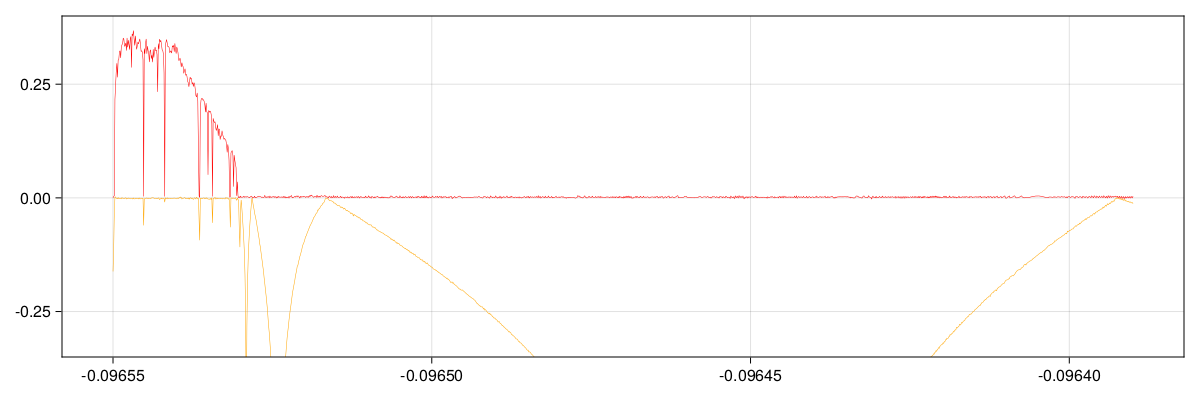

In [22]:
f = Figure(resolution = (1200, 400))
axis = Axis(f[1, 1])
lines!(axis, I0range, Λs[:, 1], color = :red, linewidth = 0.5)
lines!(axis, I0range, Λs[:, 2], color = :orange, linewidth = 0.5)
ylims!(axis, -0.35, 0.40)
f